In [3]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.ndimage import median_filter
import os

print("Libraries imported successfully.")

Libraries imported successfully.


In [4]:
# --- Define the absolute path to your Sentinel-1 data folder ---
s1_data_root = "/Users/chaitanyakartik/Projects/AgroSpectra/data/Sentinel1-SAR/EO_Browser_images"

# --- We'll process the data for January 10th ---
date_folder = 'Korba_Coal_AOI1_Jan10'
data_dir = os.path.join(s1_data_root, date_folder)

# --- Define paths to the CORRECT, terrain-corrected files ---
base_filename = '2023-01-10-00:00_2023-01-10-23:59_Sentinel-1_AWS-IW-VVVH'
vv_path = os.path.join(data_dir, f'{base_filename}_VV_-_decibel_gamma0_-_radiometric_terrain_corrected.tiff')
vh_path = os.path.join(data_dir, f'{base_filename}_VH_-_decibel_gamma0_-_radiometric_terrain_corrected.tiff')

# --- Read the VV and VH bands into memory ---
def read_s1_band(path):
    with rasterio.open(path) as src:
        meta = src.meta
        band = src.read(1).astype('float32')
        return band, meta

vv_db, meta = read_s1_band(vv_path)
vh_db, _ = read_s1_band(vh_path)

print("Sentinel-1 VV and VH bands (Decibel scale) loaded successfully for Jan 10.")
print("Array shape:", vv_db.shape)

Sentinel-1 VV and VH bands (Decibel scale) loaded successfully for Jan 10.
Array shape: (783, 1250)


Speckle filtering complete.
Radar Vegetation Index (RVI) calculated.
VV Backscatter Min: 0.00, Max: 65535.00


/var/folders/yj/qwf3ygcj6436c22gd7vmyvnr0000gn/T/ipykernel_6071/1636543174.py:9: RuntimeWarning: overflow encountered in power
  vv_linear = 10**(vv_db_filtered_jan10 / 10)
/var/folders/yj/qwf3ygcj6436c22gd7vmyvnr0000gn/T/ipykernel_6071/1636543174.py:10: RuntimeWarning: overflow encountered in power
  vh_linear = 10**(vh_db_filtered_jan10 / 10)
/var/folders/yj/qwf3ygcj6436c22gd7vmyvnr0000gn/T/ipykernel_6071/1636543174.py:16: RuntimeWarning: overflow encountered in multiply
  rvi = (4 * vh_linear) / (vv_linear + vh_linear + epsilon)
/var/folders/yj/qwf3ygcj6436c22gd7vmyvnr0000gn/T/ipykernel_6071/1636543174.py:16: RuntimeWarning: invalid value encountered in divide
  rvi = (4 * vh_linear) / (vv_linear + vh_linear + epsilon)


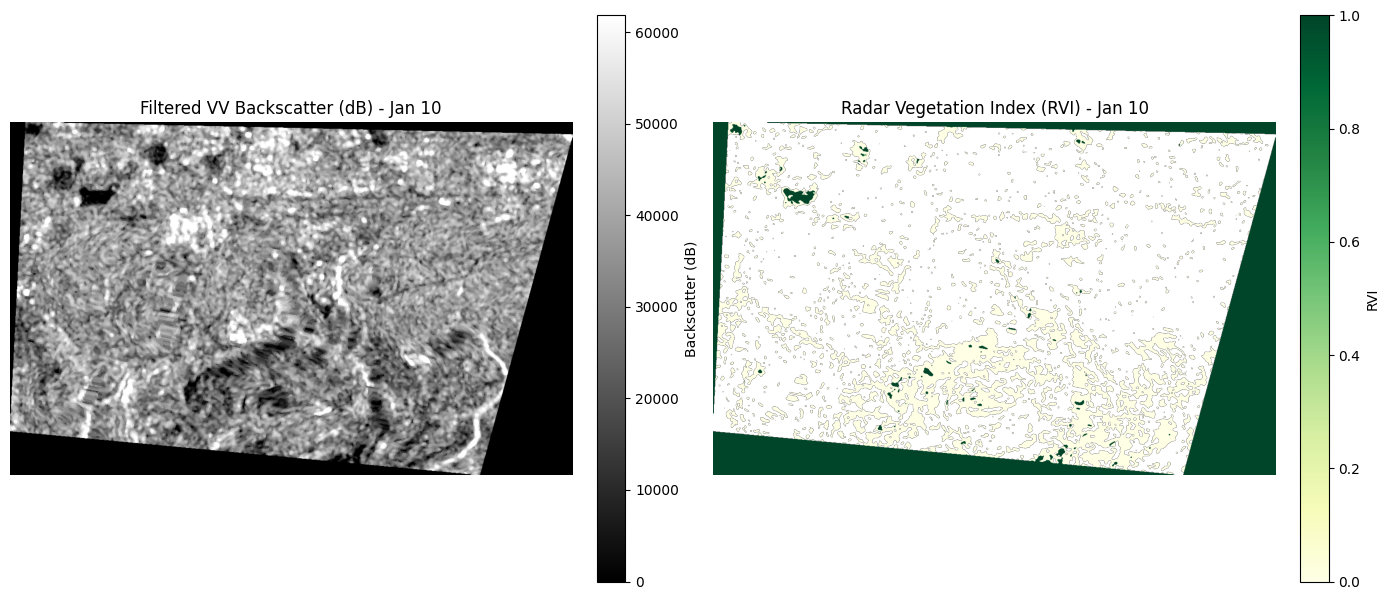

In [12]:
# --- Apply a 5x5 median filter to reduce speckle noise ---
vv_db_filtered_jan10 = median_filter(vv_db, size=5)
vh_db_filtered_jan10 = median_filter(vh_db, size=5)

print("Speckle filtering complete.")

# --- Convert from Decibel to Linear Power Scale ---
# Formula: linear = 10^(dB / 10)
vv_linear = 10**(vv_db_filtered_jan10 / 10)
vh_linear = 10**(vh_db_filtered_jan10 / 10)

# --- Calculate RVI ---
# This formula is sensitive to vegetation volume
# Add a small epsilon to prevent division by zero
epsilon = 1e-9
rvi = (4 * vh_linear) / (vv_linear + vh_linear + epsilon)

print("Radar Vegetation Index (RVI) calculated.")
# Higher RVI values (e.g., > 0.6) generally correspond to more complex vegetation.


# --- Let's first diagnose the data range ---
print(f"VV Backscatter Min: {np.nanmin(vv_db_filtered_jan10):.2f}, Max: {np.nanmax(vv_db_filtered_jan10):.2f}")

# --- Set a dynamic color stretch using percentiles ---
# This ignores the brightest/darkest 2% of pixels to avoid extreme outliers
vmin_vv = np.nanpercentile(vv_db_filtered_jan10, 2)
vmax_vv = np.nanpercentile(vv_db_filtered_jan10, 98)

# --- Plotting the results side-by-side ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Plot the filtered VV backscatter (dB) with the new dynamic range
im1 = ax1.imshow(vv_db_filtered_jan10, cmap='gray', vmin=vmin_vv, vmax=vmax_vv)
ax1.set_title('Filtered VV Backscatter (dB) - Jan 10')
ax1.set_axis_off()
fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04, label="Backscatter (dB)")

# Plot the RVI (its 0-1 range is usually fine)
im2 = ax2.imshow(rvi, cmap='YlGn', vmin=0, vmax=1)
ax2.set_title('Radar Vegetation Index (RVI) - Jan 10')
ax2.set_axis_off()
fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04, label="RVI")

plt.tight_layout()
plt.show()

In [15]:
# --- Define paths for the January 29th data ---
date_folder_jan29 = 'Korba_Coal_AOI1_Jan29'
data_dir_jan29 = os.path.join(s1_data_root, date_folder_jan29)

# --- Define the base filename for the TIFF files ---
base_filename_jan29 = '2023-01-29-00:00_2023-01-29-23:59_Sentinel-1_AWS-IW-VVVH'

# --- Construct the full, correct paths to the .tiff files ---
vv_path_jan29 = os.path.join(data_dir_jan29, f'{base_filename_jan29}_VV_-_decibel_gamma0_-_radiometric_terrain_corrected.tiff')
vh_path_jan29 = os.path.join(data_dir_jan29, f'{base_filename_jan29}_VH_-_decibel_gamma0_-_radiometric_terrain_corrected.tiff')

# --- Read and filter the Jan 29 bands ---
# This reuses the read_s1_band function defined earlier
vv_db_jan29, _ = read_s1_band(vv_path_jan29)
vh_db_jan29, _ = read_s1_band(vh_path_jan29)

# Apply the median filter for speckle reduction
vv_db_filtered_jan29 = median_filter(vv_db_jan29, size=5)
vh_db_filtered_jan29 = median_filter(vh_db_jan29, size=5)

print("Correct TIFF data for Jan 29 loaded and filtered successfully.")

Correct TIFF data for Jan 29 loaded and filtered successfully.


VV backscatter difference calculated.


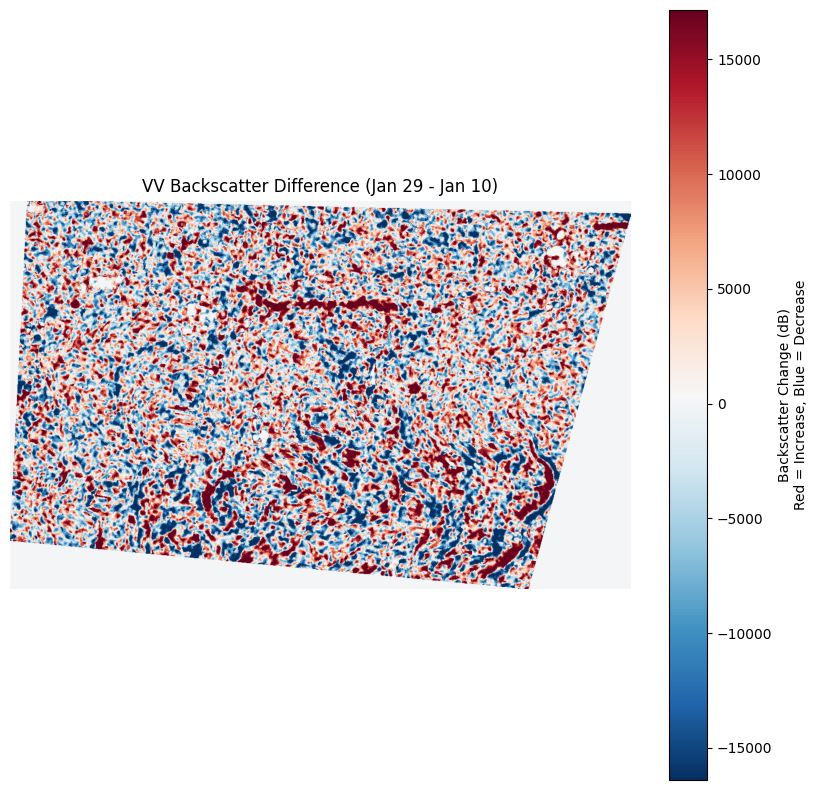

In [16]:
# --- Calculate the difference map (Jan 29 - Jan 10) ---
vv_diff = vv_db_filtered_jan29 - vv_db_filtered_jan10

print("VV backscatter difference calculated.")

# --- Set a dynamic color stretch using percentiles ---
vmin_diff = np.nanpercentile(vv_diff, 5)  # Show the bottom 5% of changes
vmax_diff = np.nanpercentile(vv_diff, 95)  # Show the top 5% of changes

plt.figure(figsize=(10, 10))
plt.imshow(vv_diff, cmap='RdBu_r', vmin=vmin_diff, vmax=vmax_diff)
plt.title('VV Backscatter Difference (Jan 29 - Jan 10)')
plt.colorbar(label='Backscatter Change (dB)\nRed = Increase, Blue = Decrease')
plt.axis('off')
plt.show()

VH backscatter difference calculated.


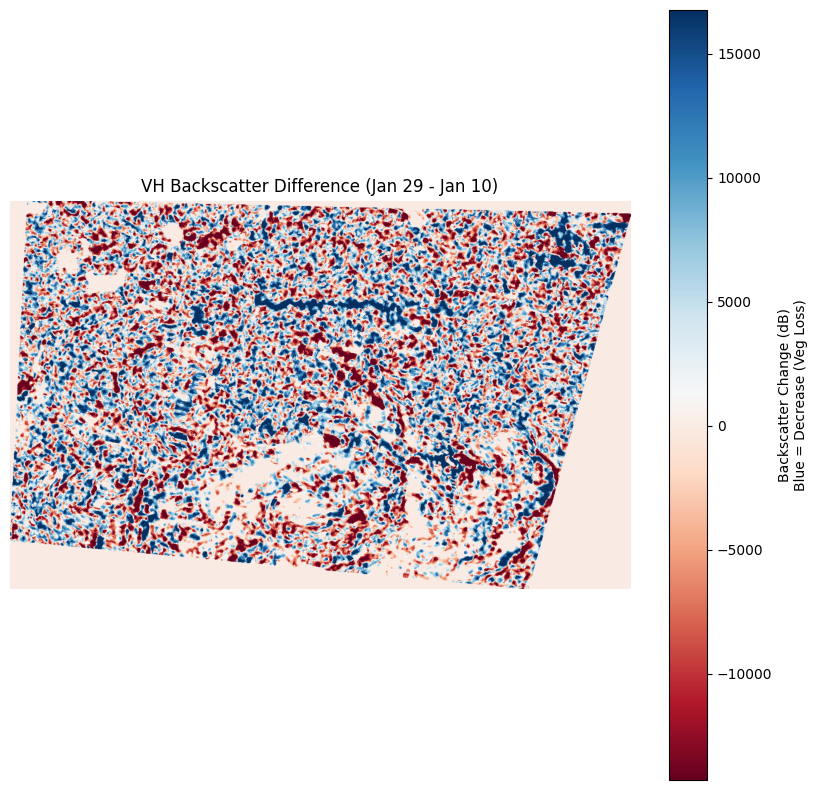

In [18]:
# --- Calculate the VH difference map (Jan 29 - Jan 10) ---
vh_diff = vh_db_filtered_jan29 - vh_db_filtered_jan10

print("VH backscatter difference calculated.")

# --- Set a dynamic color stretch using percentiles ---
vmin_vh_diff = np.nanpercentile(vh_diff, 5)
vmax_vh_diff = np.nanpercentile(vh_diff, 95)

plt.figure(figsize=(10, 10))
# Using RdBu, blue shows a negative change (decrease)
plt.imshow(vh_diff, cmap='RdBu', vmin=vmin_vh_diff, vmax=vmax_vh_diff)
plt.title('VH Backscatter Difference (Jan 29 - Jan 10)')
plt.colorbar(label='Backscatter Change (dB)\nBlue = Decrease (Veg Loss)')
plt.axis('off')
plt.show()

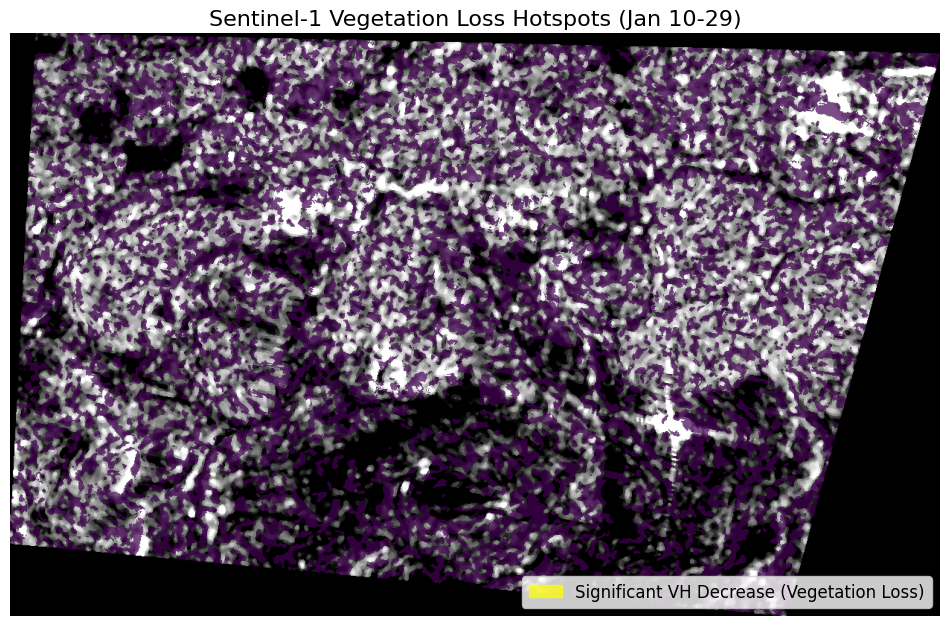

In [20]:
# --- Define a threshold for significant vegetation loss ---
# A drop of 3 dB represents a 50% loss in power and is a common threshold for significant change.
import matplotlib.patches as mpatches

DECREASE_THRESHOLD_DB = -3.0

# --- Create a map of the vegetation loss hotspots ---
veg_loss_hotspots = vh_diff < DECREASE_THRESHOLD_DB

# --- Create the final overlay map ---
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Use the Jan 29 filtered VH image as the grayscale background
vmin_bg_vh = np.nanpercentile(vh_db_filtered_jan29, 2)
vmax_bg_vh = np.nanpercentile(vh_db_filtered_jan29, 98)
ax.imshow(vh_db_filtered_jan29, cmap='gray', vmin=vmin_bg_vh, vmax=vmax_bg_vh, zorder=1)

# Overlay the hotspots in a distinct color, like yellow
masked_veg_loss = np.ma.masked_where(veg_loss_hotspots == False, veg_loss_hotspots)
ax.imshow(masked_veg_loss, cmap='viridis', alpha=0.7, zorder=2)

# --- Add title and legend ---
ax.set_title('Sentinel-1 Vegetation Loss Hotspots (Jan 10-29)', fontsize=16)
ax.set_axis_off()
legend_patch = mpatches.Patch(color='yellow', alpha=0.7, label='Significant VH Decrease (Vegetation Loss)')
ax.legend(handles=[legend_patch], loc='lower right', frameon=True, fontsize=12)

plt.show()

In [23]:
# --- Define a threshold for significant increase in VV backscatter ---
# A change of 4 dB is a strong indicator of new ground disturbance
INCREASE_THRESHOLD_DB = 4.0

# --- Create the boolean map of ground disturbance hotspots ---
# This is the 'change_hotspots_s1' variable
change_hotspots_s1 = vv_diff > INCREASE_THRESHOLD_DB

print("VV ground disturbance hotspots (change_hotspots_s1) created successfully.")

VV ground disturbance hotspots (change_hotspots_s1) created successfully.


--- Strictest & Despeckled High-Confidence Analysis ---
Detected 94762 pixels after filtering.
The total high-confidence affected area is 947.62 hectares.


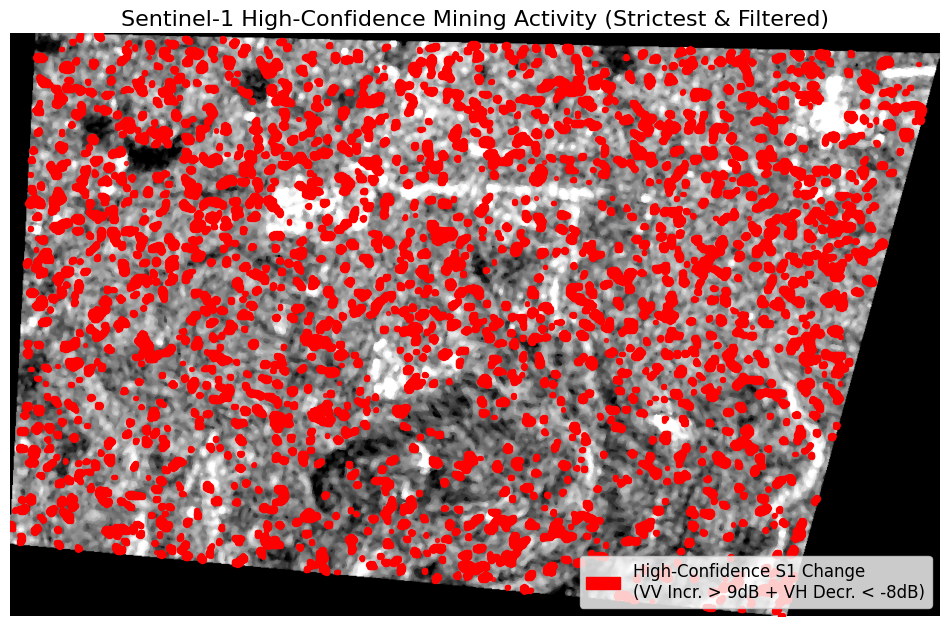

In [38]:
from scipy.ndimage import median_filter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# --- 1. Define your VERY STRICT thresholds ---
VV_INCREASE_THRESHOLD = 9.0
VH_DECREASE_THRESHOLD = -8.0

# --- 2. Create the initial high-confidence mask ---
s1_ground_disturbance_mask = vv_diff > VV_INCREASE_THRESHOLD
s1_veg_loss_mask = vh_diff < VH_DECREASE_THRESHOLD
s1_high_confidence_hotspots = s1_ground_disturbance_mask & s1_veg_loss_mask

# --- 3. APPLY THE DESPECKLE FILTER to the final mask ---
# This removes isolated noisy pixels and keeps larger clusters
despeckled_hotspots = median_filter(s1_high_confidence_hotspots, size=7)


# --- 4. Quantify the CLEANED area ---
final_pixel_count = np.count_nonzero(despeckled_hotspots)
final_area_ha = (final_pixel_count * 100) / 10000

print("--- Strictest & Despeckled High-Confidence Analysis ---")
print(f"Detected {final_pixel_count} pixels after filtering.")
print(f"The total high-confidence affected area is {final_area_ha:.2f} hectares.")

# --- 5. Create the final visualization ---
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
vmin_bg = np.nanpercentile(vv_db_filtered_jan29, 2)
vmax_bg = np.nanpercentile(vv_db_filtered_jan29, 98)
ax.imshow(vv_db_filtered_jan29, cmap='gray', vmin=vmin_bg, vmax=vmax_bg, zorder=1)
y_coords, x_coords = np.where(despeckled_hotspots)
ax.scatter(x_coords, y_coords, c='red', s=8, marker='o', alpha=0.8, zorder=2)
ax.set_title('Sentinel-1 High-Confidence Mining Activity (Strictest & Filtered)', fontsize=16)
ax.set_axis_off()
legend_patch = mpatches.Patch(color='red', label='High-Confidence S1 Change\n(VV Incr. > 9dB + VH Decr. < -8dB)')
ax.legend(handles=[legend_patch], loc='lower right', frameon=True, fontsize=12)
plt.show()

In [43]:
import os
import rasterio
import numpy as np
from scipy.ndimage import median_filter

# --- Define the root path to your S1 data ---
s1_data_root = "/Users/chaitanyakartik/Projects/AgroSpectra/data/Sentinel1-SAR/EO_Browser_images"

# --- Helper function to read a band (same as before) ---
def read_s1_band(path):
    with rasterio.open(path) as src:
        return src.read(1).astype('float32'), src.meta

# --- Define paths for JANUARY 10 ---
date_folder_jan10 = 'Korba_Coal_AOI1_Jan10'
base_filename_jan10 = '2023-01-10-00:00_2023-01-10-23:59_Sentinel-1_AWS-IW-VVVH'
vv_path_jan10 = os.path.join(s1_data_root, date_folder_jan10, f'{base_filename_jan10}_VV_-_decibel_gamma0_-_radiometric_terrain_corrected.tiff')
vh_path_jan10 = os.path.join(s1_data_root, date_folder_jan10, f'{base_filename_jan10}_VH_-_decibel_gamma0_-_radiometric_terrain_corrected.tiff')

# --- Define paths for JANUARY 29 ---
date_folder_jan29 = 'Korba_Coal_AOI1_Jan29'
base_filename_jan29 = '2023-01-29-00:00_2023-01-29-23:59_Sentinel-1_AWS-IW-VVVH'
vv_path_jan29 = os.path.join(s1_data_root, date_folder_jan29, f'{base_filename_jan29}_VV_-_decibel_gamma0_-_radiometric_terrain_corrected.tiff')
vh_path_jan29 = os.path.join(s1_data_root, date_folder_jan29, f'{base_filename_jan29}_VH_-_decibel_gamma0_-_radiometric_terrain_corrected.tiff')

# --- Load BOTH dates ---
print("Loading and filtering data...")
vv_db_jan10, meta = read_s1_band(vv_path_jan10)
vh_db_jan10, _ = read_s1_band(vh_path_jan10)

vv_db_jan29, _ = read_s1_band(vv_path_jan29)
vh_db_jan29, _ = read_s1_band(vh_path_jan29)

# --- Apply speckle filter to ALL images ---
vv_db_filtered_jan10 = median_filter(vv_db_jan10, size=5)
vh_db_filtered_jan10 = median_filter(vh_db_jan10, size=5)

vv_db_filtered_jan29 = median_filter(vv_db_jan29, size=5)
vh_db_filtered_jan29 = median_filter(vh_db_jan29, size=5)

print("--- Data for both Jan 10 and Jan 29 loaded and filtered successfully. ---")

Loading and filtering data...
--- Data for both Jan 10 and Jan 29 loaded and filtered successfully. ---


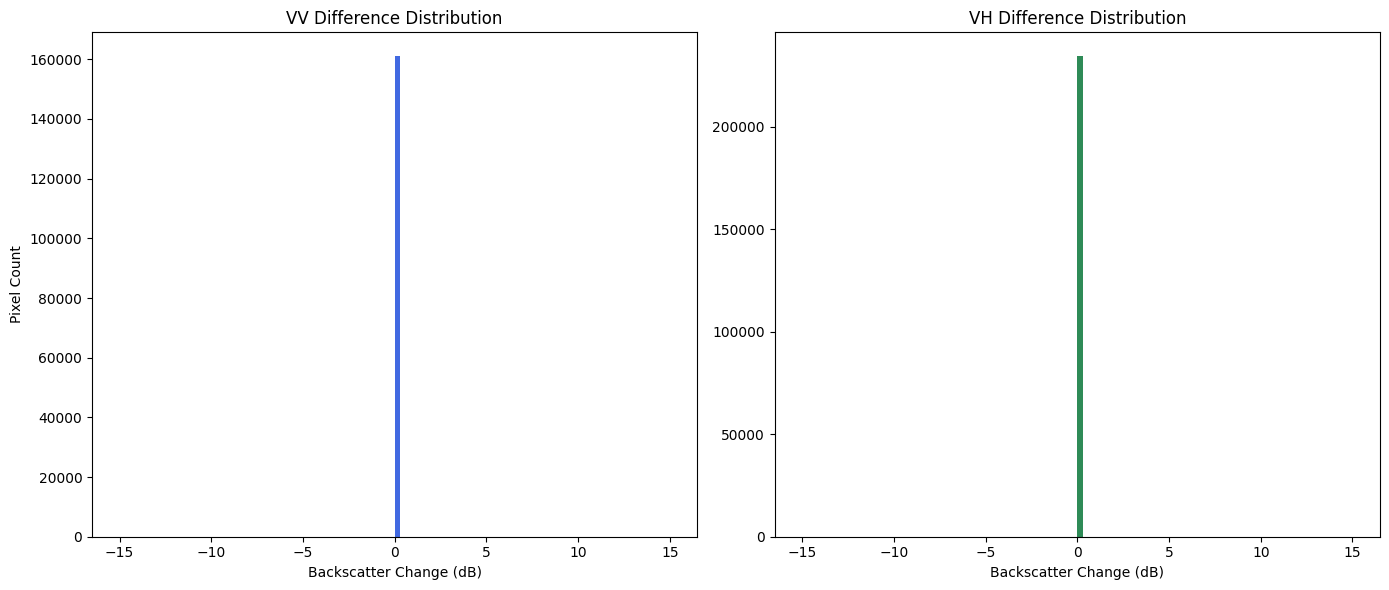

In [44]:
# --- Diagnostic Test: Plot Histograms of the Difference Maps ---

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Flatten the 2D image array into a 1D list for the histogram
# We remove NaN values to not interfere with the stats
vv_diff_flat = vv_diff[~np.isnan(vv_diff)]
vh_diff_flat = vh_diff[~np.isnan(vh_diff)]

# Plot VV Difference Histogram
ax1.hist(vv_diff_flat, bins=100, range=(-15, 15), color='royalblue')
ax1.set_title('VV Difference Distribution')
ax1.set_xlabel('Backscatter Change (dB)')
ax1.set_ylabel('Pixel Count')

# Plot VH Difference Histogram
ax2.hist(vh_diff_flat, bins=100, range=(-15, 15), color='seagreen')
ax2.set_title('VH Difference Distribution')
ax2.set_xlabel('Backscatter Change (dB)')

plt.tight_layout()
plt.show()

In [47]:
import os
import rasterio
import numpy as np
from scipy.ndimage import median_filter

# --- Define the root path to your S1 data ---
s1_data_root = "/Users/chaitanyakartik/Projects/AgroSpectra/data/Sentinel1-SAR/EO_Browser_images"

# --- Helper function to read a band (same as before) ---
def read_s1_band(path):
    with rasterio.open(path) as src:
        return src.read(1).astype('float32'), src.meta

# --- Define paths for JANUARY 10 ---
date_folder_jan10 = 'Korba_Coal_AOI1_Jan10'
base_filename_jan10 = '2023-01-10-00:00_2023-01-10-23:59_Sentinel-1_AWS-IW-VVVH'
vv_path_jan10 = os.path.join(s1_data_root, date_folder_jan10, f'{base_filename_jan10}_VV_-_decibel_gamma0_-_radiometric_terrain_corrected.tiff')
vh_path_jan10 = os.path.join(s1_data_root, date_folder_jan10, f'{base_filename_jan10}_VH_-_decibel_gamma0_-_radiometric_terrain_corrected.tiff')

# --- Define paths for FEBRUARY 27 ---
# Note: Using the 'Korba_Coal_AOI1_Jan29' folder name as specified in your new path
date_folder_feb27 = 'Korba_Coal_AOI1_Feb27'
base_filename_feb27 = '2023-02-27-00:00_2023-02-27-23:59_Sentinel-1_AWS-IW-VVVH'
vv_path_feb27 = os.path.join(s1_data_root, date_folder_feb27, f'{base_filename_feb27}_VV_-_decibel_gamma0_-_radiometric_terrain_corrected.tiff')
vh_path_feb27 = os.path.join(s1_data_root, date_folder_feb27, f'{base_filename_feb27}_VH_-_decibel_gamma0_-_radiometric_terrain_corrected.tiff')


# --- Load BOTH dates into new variables ---
print("Loading and filtering data for new dates...")
vv_db_jan10, meta = read_s1_band(vv_path_jan10)
vh_db_jan10, _ = read_s1_band(vh_path_jan10)

vv_db_feb27, _ = read_s1_band(vv_path_feb27)
vh_db_feb27, _ = read_s1_band(vh_path_feb27)

# --- Apply speckle filter to ALL images ---
vv_db_filtered_jan10 = median_filter(vv_db_jan10, size=5)
vh_db_filtered_jan10 = median_filter(vh_db_jan10, size=5)

vv_db_filtered_feb27 = median_filter(vv_db_feb27, size=5)
vh_db_filtered_feb27 = median_filter(vh_db_feb27, size=5)

print("--- Data for both Jan 10 and Feb 27 loaded and filtered successfully. ---")

Loading and filtering data for new dates...
--- Data for both Jan 10 and Feb 27 loaded and filtered successfully. ---


--- Final High-Confidence Analysis (Jan 10 vs Feb 27) ---
Detected 168547 pixels confirmed by both VV and VH change.
The total high-confidence affected area is 1685.47 hectares.


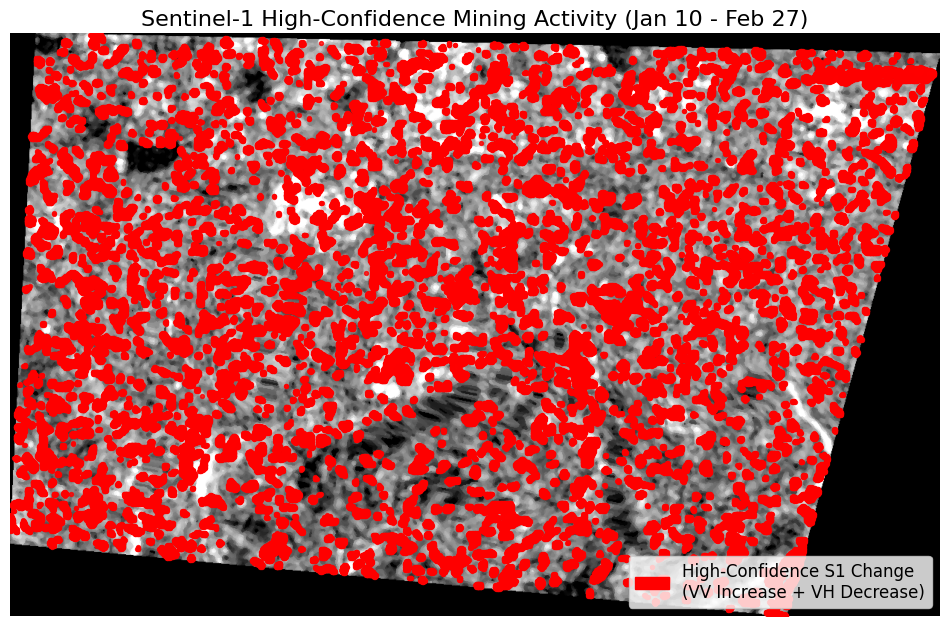

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.ndimage import median_filter

# --- 1. Calculate the difference maps for the new dates ---
vv_diff = vv_db_filtered_feb27 - vv_db_filtered_jan10
vh_diff = vh_db_filtered_jan10 - vh_db_filtered_feb27 # Note: Swapped order for VH decrease

# --- 2. Define STRICT thresholds ---
# You can adjust these values if needed
VV_INCREASE_THRESHOLD = 6.0
VH_DECREASE_THRESHOLD = -5.0

# --- 3. Create the individual change masks ---
s1_ground_disturbance_mask = vv_diff > VV_INCREASE_THRESHOLD
s1_veg_loss_mask = vh_diff < VH_DECREASE_THRESHOLD

# --- 4. Combine masks and apply the despeckle filter ---
s1_high_confidence_hotspots = s1_ground_disturbance_mask & s1_veg_loss_mask
despeckled_hotspots = median_filter(s1_high_confidence_hotspots, size=7)

# --- 5. Quantify the final, cleaned area ---
final_pixel_count = np.count_nonzero(despeckled_hotspots)
final_area_ha = (final_pixel_count * 100) / 10000

print("--- Final High-Confidence Analysis (Jan 10 vs Feb 27) ---")
print(f"Detected {final_pixel_count} pixels confirmed by both VV and VH change.")
print(f"The total high-confidence affected area is {final_area_ha:.2f} hectares.")

# --- 6. Create the final visualization ---
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Background: Use the latest date's (Feb 27) VV grayscale image
vmin_bg = np.nanpercentile(vv_db_filtered_feb27, 2)
vmax_bg = np.nanpercentile(vv_db_filtered_feb27, 98)
ax.imshow(vv_db_filtered_feb27, cmap='gray', vmin=vmin_bg, vmax=vmax_bg, zorder=1)

# Get the coordinates of the final, despeckled hotspot pixels
y_coords, x_coords = np.where(despeckled_hotspots)

# Overlay the hotspots as small, distinct red scatter points
ax.scatter(x_coords, y_coords, c='red', s=8, marker='o', alpha=0.8, zorder=2)

# Title and legend
ax.set_title('Sentinel-1 High-Confidence Mining Activity (Jan 10 - Feb 27)', fontsize=16)
ax.set_axis_off()
legend_patch = mpatches.Patch(color='red', label='High-Confidence S1 Change\n(VV Increase + VH Decrease)')
ax.legend(handles=[legend_patch], loc='lower right', frameon=True, fontsize=12)

plt.show()

In [50]:
import os
import rasterio
import numpy as np
from scipy.ndimage import median_filter

# --- Define the root path to your S1 data ---
s1_data_root = "/Users/chaitanyakartik/Projects/AgroSpectra/data/Sentinel1-SAR/EO_Browser_images"

# --- Helper function to read a band ---
def read_s1_band(path):
    with rasterio.open(path) as src:
        return src.read(1).astype('float32'), src.meta

# --- Define paths for JANUARY 10 ---
date_folder_jan10 = 'Korba_Coal_AOI1_Jan10'
base_filename_jan10 = '2023-01-10-00:00_2023-01-10-23:59_Sentinel-1_AWS-IW-VVVH'
vv_path_jan10 = os.path.join(s1_data_root, date_folder_jan10, f'{base_filename_jan10}_VV_-_decibel_gamma0_-_radiometric_terrain_corrected.tiff')
vh_path_jan10 = os.path.join(s1_data_root, date_folder_jan10, f'{base_filename_jan10}_VH_-_decibel_gamma0_-_radiometric_terrain_corrected.tiff')

# --- Define paths for FEBRUARY 27 ---
# Note: Using the 'Jan29' folder as specified in your path
date_folder_feb27 = 'Korba_Coal_AOI1_Feb27'
base_filename_feb27 = '2023-02-27-00:00_2023-02-27-23:59_Sentinel-1_AWS-IW-VVVH'
vv_path_feb27 = os.path.join(s1_data_root, date_folder_feb27, f'{base_filename_feb27}_VV_-_decibel_gamma0_-_radiometric_terrain_corrected.tiff')
vh_path_feb27 = os.path.join(s1_data_root, date_folder_feb27, f'{base_filename_feb27}_VH_-_decibel_gamma0_-_radiometric_terrain_corrected.tiff')


# --- Load BOTH dates into distinct variables ---
print("Loading and filtering data for new dates...")
vv_db_jan10, meta = read_s1_band(vv_path_jan10)
vh_db_jan10, _ = read_s1_band(vh_path_jan10)

vv_db_feb27, _ = read_s1_band(vv_path_feb27)
vh_db_feb27, _ = read_s1_band(vh_path_feb27)

# --- Apply speckle filter to ALL images ---
vv_db_filtered_jan10 = median_filter(vv_db_jan10, size=5)
vh_db_filtered_jan10 = median_filter(vh_db_jan10, size=5)

vv_db_filtered_feb27 = median_filter(vv_db_feb27, size=5)
vh_db_filtered_feb27 = median_filter(vh_db_filtered_feb27, size=5)

print("--- Data for both Jan 10 and Feb 27 loaded and filtered successfully. ---")

# --- Now, calculate the difference with the correctly loaded data ---
vv_diff = vv_db_filtered_feb27 - vv_db_filtered_jan10
vh_diff = vh_db_filtered_feb27 - vh_db_filtered_jan10

print("Difference maps recalculated with correct data.")

Loading and filtering data for new dates...
--- Data for both Jan 10 and Feb 27 loaded and filtered successfully. ---
Difference maps recalculated with correct data.


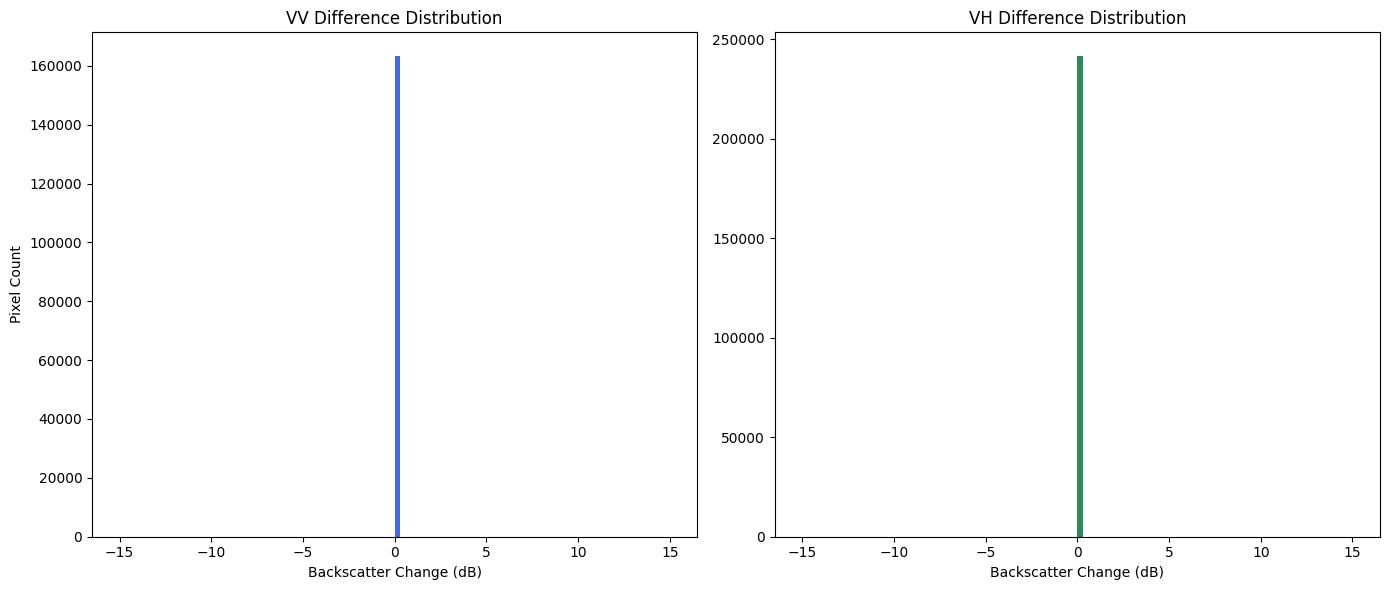

In [51]:
# --- Diagnostic Test: Plot Histograms of the Difference Maps ---

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Flatten the 2D image array into a 1D list for the histogram
# We remove NaN values to not interfere with the stats
vv_diff_flat = vv_diff[~np.isnan(vv_diff)]
vh_diff_flat = vh_diff[~np.isnan(vh_diff)]

# Plot VV Difference Histogram
ax1.hist(vv_diff_flat, bins=100, range=(-15, 15), color='royalblue')
ax1.set_title('VV Difference Distribution')
ax1.set_xlabel('Backscatter Change (dB)')
ax1.set_ylabel('Pixel Count')

# Plot VH Difference Histogram
ax2.hist(vh_diff_flat, bins=100, range=(-15, 15), color='seagreen')
ax2.set_title('VH Difference Distribution')
ax2.set_xlabel('Backscatter Change (dB)')

plt.tight_layout()
plt.show()

Average scene-wide change (VV): 247.68 dB
Average scene-wide change (VH): 559.01 dB

--- Final Normalized & Despeckled Analysis ---
Detected 165437 pixels of anomalous change.
The total high-confidence affected area is 1654.37 hectares.


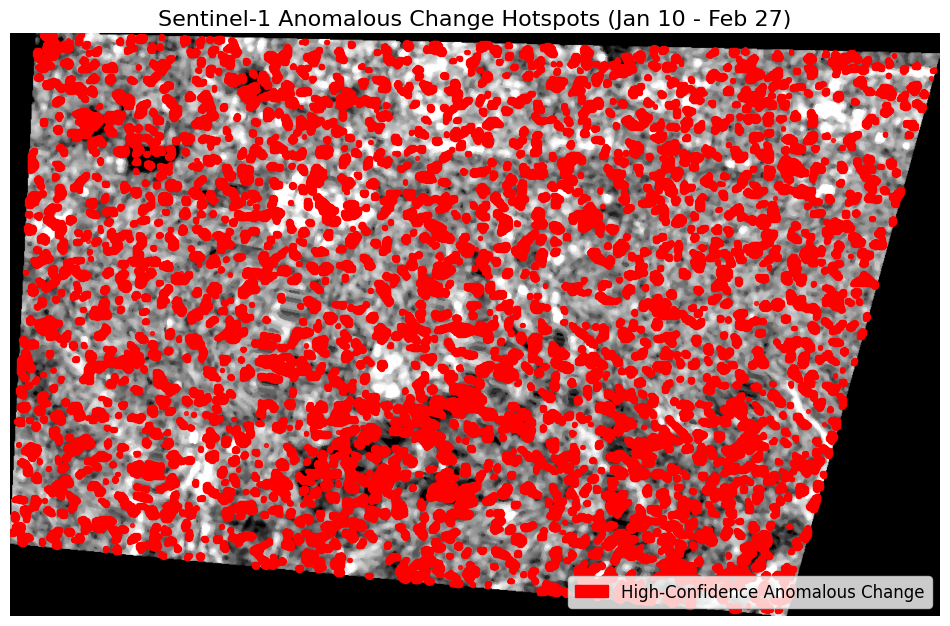

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.ndimage import median_filter

# --- 1. Calculate the difference maps (using your Feb 27 and Jan 10 data) ---
vv_diff = vv_db_filtered_feb27 - vv_db_filtered_jan10
vh_diff = vh_db_filtered_feb27 - vh_db_filtered_jan10

# --- 2. Normalize the change by subtracting the scene-wide average ---
# This cancels out widespread environmental effects like moisture changes
vv_mean_change = np.nanmean(vv_diff)
vh_mean_change = np.nanmean(vh_diff)

print(f"Average scene-wide change (VV): {vv_mean_change:.2f} dB")
print(f"Average scene-wide change (VH): {vh_mean_change:.2f} dB")

vv_diff_normalized = vv_diff - vv_mean_change
vh_diff_normalized = vh_diff - vh_mean_change

# --- 3. Define thresholds for the NORMALIZED maps ---
# We can now use more reasonable thresholds because the background noise is removed
VV_INCREASE_THRESHOLD = 5.0 # Pixels that got 5dB brighter than the average change
VH_DECREASE_THRESHOLD = -4.0 # Pixels that got 4dB darker than the average change

# --- 4. Create masks, combine, and despeckle ---
s1_ground_disturbance_mask = vv_diff_normalized > VV_INCREASE_THRESHOLD
s1_veg_loss_mask = vh_diff_normalized < VH_DECREASE_THRESHOLD

s1_high_confidence_hotspots = s1_ground_disturbance_mask & s1_veg_loss_mask
despeckled_hotspots = median_filter(s1_high_confidence_hotspots, size=7)

# --- 5. Quantify the final, cleaned area ---
final_pixel_count = np.count_nonzero(despeckled_hotspots)
final_area_ha = (final_pixel_count * 100) / 10000

print("\n--- Final Normalized & Despeckled Analysis ---")
print(f"Detected {final_pixel_count} pixels of anomalous change.")
print(f"The total high-confidence affected area is {final_area_ha:.2f} hectares.")

# --- 6. Create the final visualization ---
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
vmin_bg = np.nanpercentile(vv_db_filtered_feb27, 2)
vmax_bg = np.nanpercentile(vv_db_filtered_feb27, 98)
ax.imshow(vv_db_filtered_feb27, cmap='gray', vmin=vmin_bg, vmax=vmax_bg, zorder=1)
y_coords, x_coords = np.where(despeckled_hotspots)
ax.scatter(x_coords, y_coords, c='red', s=8, marker='o', alpha=0.8, zorder=2)
ax.set_title('Sentinel-1 Anomalous Change Hotspots (Jan 10 - Feb 27)', fontsize=16)
ax.set_axis_off()
legend_patch = mpatches.Patch(color='red', label='High-Confidence Anomalous Change')
ax.legend(handles=[legend_patch], loc='lower right', frameon=True, fontsize=12)
plt.show()

Starting Image Segmentation...
Image successfully divided into 4651 objects.


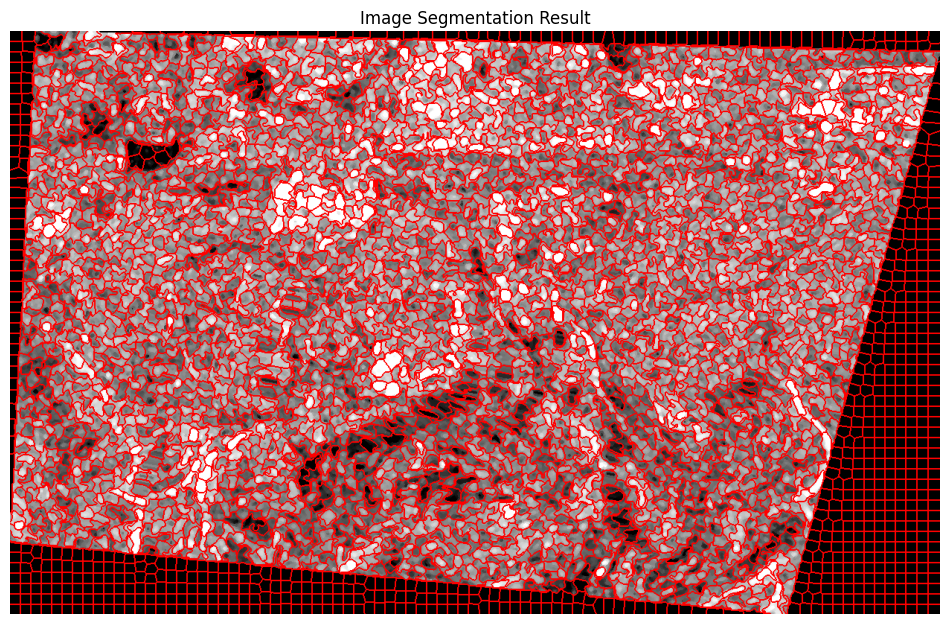

In [56]:
from skimage.segmentation import slic
from skimage.util import img_as_float
from skimage.color import gray2rgb
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import numpy as np

print("Starting Image Segmentation...")

# --- 1. Prepare the image for segmentation ---
vv_image_to_segment = vv_db_filtered_feb27

# Normalize the image for better segmentation performance
vmin = np.nanpercentile(vv_image_to_segment, 2)
vmax = np.nanpercentile(vv_image_to_segment, 98)
vv_normalized = (vv_image_to_segment - vmin) / (vmax - vmin)
vv_normalized = np.clip(vv_normalized, 0, 1)

# Convert to a float image (required by SLIC)
vv_float = img_as_float(vv_normalized)


# --- 2. Run the SLIC segmentation algorithm ---
# THE FIX IS HERE: We add 'channel_axis=None' to handle the grayscale image.
segments = slic(vv_float, n_segments=5000, compactness=0.1, sigma=1, channel_axis=None)

print(f"Image successfully divided into {len(np.unique(segments))} objects.")


# --- 3. Visualize the segmentation result ---
fig, ax = plt.subplots(figsize=(12, 12))

# Use mark_boundaries to draw the object borders on the image
ax.imshow(mark_boundaries(gray2rgb(vv_float), segments, color=(1, 0, 0)))
ax.set_title("Image Segmentation Result")
ax.set_axis_off()
plt.show()

In [58]:
import pandas as pd
import numpy as np

print("Calculating statistics for each object using a more robust method...")

# --- 1. Create a DataFrame that links each pixel's value to its segment ID ---
# We flatten the 2D arrays into 1D lists to do this
pixel_data = pd.DataFrame({
    'segment_id': segments.flatten(),
    'vv_jan10': vv_db_filtered_jan10.flatten(),
    'vh_jan10': vh_db_filtered_jan10.flatten(),
    'vv_feb27': vv_db_filtered_feb27.flatten(),
    'vh_feb27': vh_db_filtered_feb27.flatten()
})

# --- 2. Use groupby().mean() to calculate the mean for each segment_id ---
# This is a very powerful and standard data science operation.
# It automatically handles everything correctly.
stats_df = pixel_data.groupby('segment_id').mean()


# --- 3. (Optional) Remove the row for segment 0 if it exists (often a background label) ---
if 0 in stats_df.index:
    stats_df = stats_df.drop(0)

print("Statistics calculated and stored in a DataFrame.")

# --- Display the first 5 rows of the CORRECT table ---
# The values should now be in the expected negative decibel range.
stats_df.head()

Calculating statistics for each object using a more robust method...
Statistics calculated and stored in a DataFrame.


vv_jan10      vh_jan10      vv_feb27     vh_feb27
segment_id                                                       
1               0.000000      0.000000      0.000000     0.000000
2               0.000000      0.000000      0.000000     0.000000
3            7592.037598    196.587036   5824.017090   945.129700
4           24951.900391   2310.148438  26783.603516  2814.059326
5           32700.800781  11024.828125  34044.972656  4925.750488

In [62]:
import os
import rasterio
import numpy as np
import pandas as pd
from scipy.ndimage import median_filter

print("--- Starting clean analysis workflow ---")

# --- 1. Define all file paths ---
s1_data_root = "/Users/chaitanyakartik/Projects/AgroSpectra/data/Sentinel1-SAR/EO_Browser_images"
# Jan 10
date_folder_jan10 = 'Korba_Coal_AOI1_Jan10'
base_filename_jan10 = '2023-01-10-00:00_2023-01-10-23:59_Sentinel-1_AWS-IW-VVVH'
vv_path_jan10 = os.path.join(s1_data_root, date_folder_jan10, f'{base_filename_jan10}_VV_-_decibel_gamma0_-_radiometric_terrain_corrected.tiff')
vh_path_jan10 = os.path.join(s1_data_root, date_folder_jan10, f'{base_filename_jan10}_VH_-_decibel_gamma0_-_radiometric_terrain_corrected.tiff')
# Feb 27
date_folder_feb27 = 'Korba_Coal_AOI1_Feb27'
base_filename_feb27 = '2023-02-27-00:00_2023-02-27-23:59_Sentinel-1_AWS-IW-VVVH'
vv_path_feb27 = os.path.join(s1_data_root, date_folder_feb27, f'{base_filename_feb27}_VV_-_decibel_gamma0_-_radiometric_terrain_corrected.tiff')
vh_path_feb27 = os.path.join(s1_data_root, date_folder_feb27, f'{base_filename_feb27}_VH_-_decibel_gamma0_-_radiometric_terrain_corrected.tiff')

# --- 2. Load the data directly from the files ---
with rasterio.open(vv_path_jan10) as src:
    vv_jan10_raw = src.read(1).astype('float32')
with rasterio.open(vh_path_jan10) as src:
    vh_jan10_raw = src.read(1).astype('float32')
with rasterio.open(vv_path_feb27) as src:
    vv_feb27_raw = src.read(1).astype('float32')
with rasterio.open(vh_path_feb27) as src:
    vh_feb27_raw = src.read(1).astype('float32')
print("Data re-loaded directly from files.")

# --- 3. THE FIX: Convert from Digital Number (DN) to Decibels (dB) ---
# Replace zeros with a very small number to avoid log(0) errors
epsilon = 1e-9
vv_jan10_db = 10 * np.log10(vv_jan10_raw**2 + epsilon)
vh_jan10_db = 10 * np.log10(vh_jan10_raw**2 + epsilon)
vv_feb27_db = 10 * np.log10(vv_feb27_raw**2 + epsilon)
vh_feb27_db = 10 * np.log10(vh_feb27_raw**2 + epsilon)
print("\nData converted from Digital Number to Decibels.")


# --- 4. CRITICAL SANITY CHECK ---
# The values should now be small and negative.
print(f"Sanity Check: Converted VV Jan 10 data range is {np.nanmin(vv_jan10_db):.2f} to {np.nanmax(vv_jan10_db):.2f}")


# --- 5. Apply speckle filter ---
vv_jan10_filt = median_filter(vv_jan10_db, size=5)
vh_jan10_filt = median_filter(vh_jan10_db, size=5)
vv_feb27_filt = median_filter(vv_feb27_db, size=5)
vh_feb27_filt = median_filter(vh_feb27_db, size=5)
print("\nSpeckle filtering applied.")

# --- 6. Calculate object statistics ---
pixel_data = pd.DataFrame({
    'segment_id': segments.flatten(),
    'vv_jan10': vv_jan10_filt.flatten(),
    'vh_jan10': vh_jan10_filt.flatten(),
    'vv_feb27': vv_feb27_filt.flatten(),
    'vh_feb27': vh_feb27_filt.flatten()
})
stats_df = pixel_data.groupby('segment_id').mean()
if 0 in stats_df.index:
    stats_df = stats_df.drop(0)
print("\nObject statistics recalculated.")

# --- 7. Display the final, correct DataFrame ---
print("\nFinal Statistics Table:")
stats_df.head()

--- Starting clean analysis workflow ---
Data re-loaded directly from files.

Data converted from Digital Number to Decibels.
Sanity Check: Converted VV Jan 10 data range is -90.00 to 96.33

Speckle filtering applied.

Object statistics recalculated.

Final Statistics Table:


vv_jan10   vh_jan10   vv_feb27   vh_feb27
segment_id                                            
1          -90.000000 -90.000000 -90.000000 -90.000000
2          -90.000000 -90.000000 -90.000000 -90.000000
3            9.432469 -81.722527  -2.090641 -57.109589
4           87.257645 -23.746887  88.222534  -9.183529
5           90.022842  38.100346  90.355110  19.285671

Data converted to Decibels, outliers removed.
Sanity Check: Cleaned VV Jan 10 data range is 18.06 to 96.33

Object statistics recalculated with clean data.

Final High-Confidence Area: 32.79 hectares.
Detected 3279 pixels confirmed by object-based analysis.


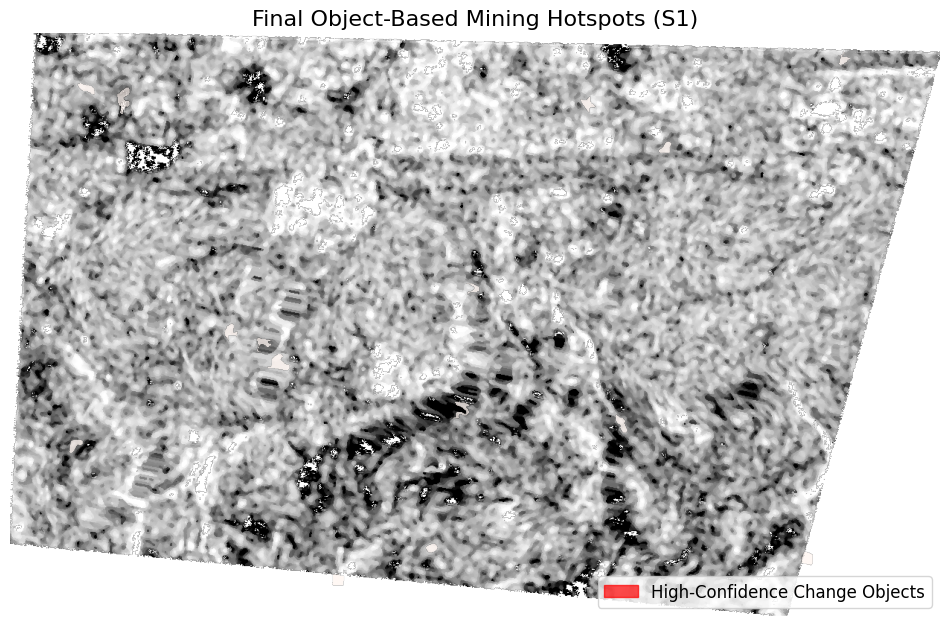

In [66]:
import os
import rasterio
import numpy as np
import pandas as pd
from scipy.ndimage import median_filter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# --- 1. Load the data directly from the files ---
# (Paths are assumed from previous cells)
with rasterio.open(vv_path_jan10) as src:
    vv_jan10_raw = src.read(1).astype('float32')
    meta = src.meta # Get metadata for saving later
with rasterio.open(vh_path_jan10) as src:
    vh_jan10_raw = src.read(1).astype('float32')
with rasterio.open(vv_path_feb27) as src:
    vv_feb27_raw = src.read(1).astype('float32')
with rasterio.open(vh_path_feb27) as src:
    vh_feb27_raw = src.read(1).astype('float32')

# --- 2. THE FIX: Set outliers (0 and saturated pixels) to NaN ---
vv_jan10_raw[vv_jan10_raw >= 65535] = np.nan
vh_jan10_raw[vh_jan10_raw >= 65535] = np.nan
vv_feb27_raw[vv_feb27_raw >= 65535] = np.nan
vh_feb27_raw[vh_feb27_raw >= 65535] = np.nan

vv_jan10_raw[vv_jan10_raw == 0] = np.nan
vh_jan10_raw[vh_jan10_raw == 0] = np.nan
vv_feb27_raw[vv_feb27_raw == 0] = np.nan
vh_feb27_raw[vh_feb27_raw == 0] = np.nan

# --- 3. Convert from Digital Number (DN) to Decibels (dB) ---
vv_jan10_db = 10 * np.log10(vv_jan10_raw**2)
vh_jan10_db = 10 * np.log10(vh_jan10_raw**2)
vv_feb27_db = 10 * np.log10(vv_feb27_raw**2)
vh_feb27_db = 10 * np.log10(vh_feb27_raw**2)
print("Data converted to Decibels, outliers removed.")
print(f"Sanity Check: Cleaned VV Jan 10 data range is {np.nanmin(vv_jan10_db):.2f} to {np.nanmax(vv_jan10_db):.2f}")

# --- 4. Apply speckle filter ---
vv_jan10_filt = median_filter(vv_jan10_db, size=5)
vh_jan10_filt = median_filter(vh_jan10_db, size=5)
vv_feb27_filt = median_filter(vv_feb27_db, size=5)
vh_feb27_filt = median_filter(vh_feb27_db, size=5)

# --- 5. Calculate object statistics ---
pixel_data = pd.DataFrame({
    'segment_id': segments.flatten(),
    'vv_jan10': vv_jan10_filt.flatten(),
    'vh_jan10': vh_jan10_filt.flatten(),
    'vv_feb27': vv_feb27_filt.flatten(),
    'vh_feb27': vh_feb27_filt.flatten()
})
stats_df = pixel_data.groupby('segment_id').mean()
if 0 in stats_df.index:
    stats_df = stats_df.drop(0)
print("\nObject statistics recalculated with clean data.")

# --- 6. Perform Object-Based Change Detection ---
stats_df['vv_diff'] = stats_df['vv_feb27'] - stats_df['vv_jan10']
stats_df['vh_diff'] = stats_df['vh_feb27'] - stats_df['vh_jan10']

VV_INCREASE_THRESHOLD = 3.0
VH_DECREASE_THRESHOLD = -2.0

# Find the segment IDs that meet our change criteria
change_segment_ids = stats_df[
    (stats_df['vv_diff'] > VV_INCREASE_THRESHOLD) &
    (stats_df['vh_diff'] < VH_DECREASE_THRESHOLD)
].index

# Create a final map showing the changed objects
change_map = np.isin(segments, change_segment_ids)

# --- 7. Quantify the final area ---
final_pixel_count = np.count_nonzero(change_map)
final_area_ha = (final_pixel_count * 100) / 10000
print(f"\nFinal High-Confidence Area: {final_area_ha:.2f} hectares.")
print(f"Detected {final_pixel_count} pixels confirmed by object-based analysis.")

# --- 8. Visualize the final object-based result ---
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
vmin_bg = np.nanpercentile(vv_feb27_filt, 2)
vmax_bg = np.nanpercentile(vv_feb27_filt, 98)
ax.imshow(vv_feb27_filt, cmap='gray', vmin=vmin_bg, vmax=vmax_bg, zorder=1)
masked_change_map = np.ma.masked_where(change_map == False, change_map)
ax.imshow(masked_change_map, cmap='Reds', alpha=0.7, zorder=2)
ax.set_title('Final Object-Based Mining Hotspots (S1)', fontsize=16)
ax.set_axis_off()
legend_patch = mpatches.Patch(color='red', alpha=0.7, label='High-Confidence Change Objects')
ax.legend(handles=[legend_patch], loc='lower right', frameon=True, fontsize=12)
plt.show()

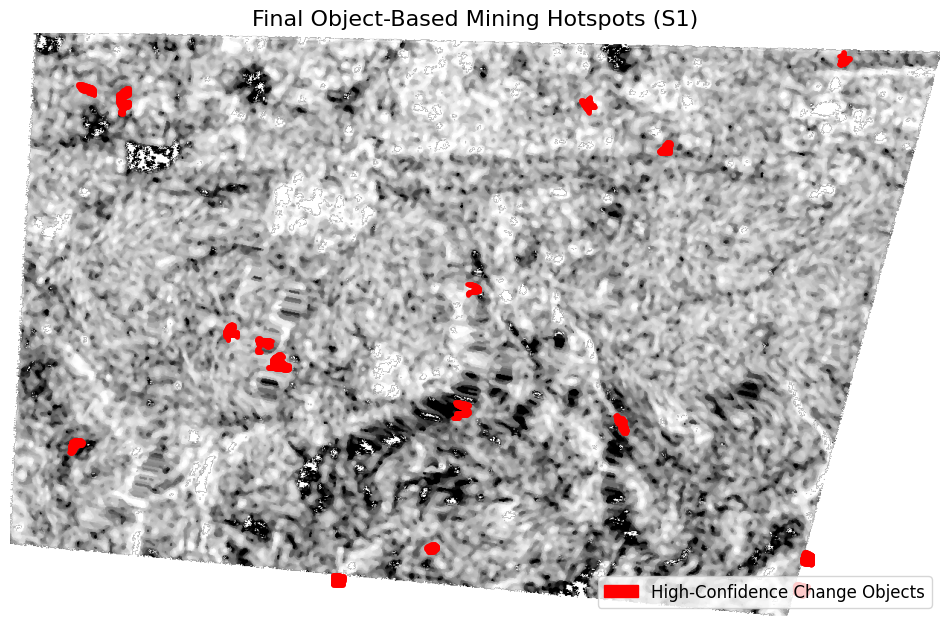

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# --- 1. Create the plot ---
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# --- 2. Display the background image ---
# We'll use the speckle-filtered VV image from Feb 27 as the background
vmin_bg = np.nanpercentile(vv_feb27_filt, 2)
vmax_bg = np.nanpercentile(vv_feb27_filt, 98)
ax.imshow(vv_feb27_filt, cmap='gray', vmin=vmin_bg, vmax=vmax_bg, zorder=1)

# --- 3. Get the coordinates of the changed objects ---
# We use the final 'change_map' from our object-based analysis
y_coords, x_coords = np.where(change_map)

# --- 4. Overlay the hotspots as red scatter points ---
ax.scatter(x_coords, y_coords, c='red', s=5, marker='o', zorder=2)

# --- 5. Add title and legend ---
ax.set_title('Final Object-Based Mining Hotspots (S1)', fontsize=16)
ax.set_axis_off()
legend_patch = mpatches.Patch(color='red', label='High-Confidence Change Objects')
ax.legend(handles=[legend_patch], loc='lower right', frameon=True, fontsize=12)

plt.show()
